## Data processing part

In [1]:
# Running regression on daily close price based on four years data, data processing part.
import pandas as pd
# Getting the date we need from google finance API
from googleclient import get_price_data
# currencyTicker represents the bitcoin price, and the most tradable currency include Japanese Yen, Swiss Franc, 
# Australian Dollar, Canadian Dollar, Indian Rupee, Euro. The price data for these currency are all quoted in dollar.
currencyTickers = ["CURRENCY:BTCUSD", "CURRENCY:GBPUSD", "CURRENCY:JPYUSD", "CURRENCY:CHFUSD", 
                  "CURRENCY:AUDUSD", "CURRENCY:CADUSD", "CURRENCY:INRUSD" , "CURRENCY:EURUSD"]
# 24 Most Liquid ETFs: 
# SPDR S&P 500 (SPY)
# Financial Select Sector SPDR (XLF)
# Russell 2000 Index Fund Profile (IWM)
# MSCI Emerging Markets Index Fund (EEM)
# PowerShares QQQ (QQQ)
# Vanguard MSCI Emerging Markets ETF (VWO)
# MSCI EAFE Index Fund (EFA)
# FTSE China 25 Index Fund (FXI)
# Industrial Select Sector SPDR Fund (XLI)
# Daily Small Cap Bear 3X Shares Fundamentals (TZA)
# Energy Select Sector SPDR Fund (XLE)
# UltraShort S&P500 (SDS)
# Silver Trust ETF (SLV)
# Direxion Daily Financial Bear 3x Shares (FAZ)
# Market Vectors TR Gold Miners ETF (GDX)
# MSCI Japan Index Fund (EWJ)
# UltraPro Short S&P500 (SPXU)
# MSCI Brazil Index Fund (EWZ)
# Daily Financial Bull 3X Shares (FAS)
# VelocityShares Daily 2x VIX Short-Term ETN (TVIX)
# United States Oil Fund (USO)
# SPDR Gold Shares (GLD)
# UltraShort Barclays 20+ Year Treasury (TBT)    
# United States Natural Gas Fund (UNG)
etfTickers = ["NYSEARCA:XLF", "NYSEARCA:IWM", "NYSEARCA:EEM", "NASDAQ:QQQ", "NYSEARCA:VWO", "NYSEARCA:EFA", 
              "NYSEARCA:FXI", "NYSEARCA:XLI", "NYSEARCA:TZA", "NYSEARCA:XLE", "NYSEARCA:SDS", "NYSEARCA:SLV", 
              "NYSEARCA:FAZ", "NYSEARCA:GDX", "NYSEARCA:EWJ", "NYSEARCA:SPXU", "NYSEARCA:EWZ", "NYSEARCA:FAS",
              "NASDAQ:TVIX", "NYSEARCA:USO", "NYSEARCA:GLD", "NYSEARCA:TBT", "NYSEARCA:UNG"]
# Function use to get currency data and major stock index
def getClosePrice(target):
    market, ticker = target.split(':')
    param = {
        'q': ticker, # Bitcoin price in USD
        'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
        'x': market,
        'p': "4Y" # Period (Ex: "4Y" = 4 year)
    }
    df = get_price_data(param)
    price = df[['Close']]
    price = price.reset_index()
    price['index'] = price['index'].apply(lambda x: x.date())
    price.columns = ['Date', ticker]
    return price

def getClosePriceTable(targetList):
    df_table = pd.DataFrame()
    for target in targetList:
        price = getClosePrice(target)
        if (df_table.shape == (0,0)):
            df_table = price
        else:
            df_table = pd.merge(df_table, price, how = 'outer', on = 'Date')
    return df_table

# Get a joined table of all tickers sharing the same Data index
priceTable = getClosePriceTable(currencyTickers + etfTickers)
# The interpolation method I use here is linear interpolation.
priceTable['Date'] = pd.to_datetime(priceTable.Date)
priceTable = priceTable.sort_values(by='Date')
priceTable = priceTable.interpolate(method='linear', axis=0).ffill().bfill()
priceTable = priceTable.set_index('Date')
priceTable

,BTCUSD,GBPUSD,JPYUSD,CHFUSD,AUDUSD,CADUSD,INRUSD,EURUSD,XLF,IWM,...,GDX,EWJ,SPXU,EWZ,FAS,TVIX,USO,GLD,TBT,UNG
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-07,713.990,1.634650,0.009719,1.120762,0.910160,0.939364,0.016277,1.370280,21.480000,112.450000,...,21.210000,47.760000,64.880000,45.520000,21.050000,21000.000000,34.910000,119.720000,78.070000,20.700000
2013-12-08,713.310,1.634800,0.009693,1.122127,0.912400,0.939541,0.016277,1.371350,21.480000,112.450000,...,21.210000,47.760000,64.880000,45.520000,21.050000,21000.000000,34.910000,119.720000,78.070000,20.700000
2013-12-09,895.680,1.642200,0.009684,1.122876,0.910300,0.940336,0.016356,1.373600,21.480000,112.450000,...,21.210000,47.760000,64.880000,45.520000,21.050000,21000.000000,34.910000,119.720000,78.070000,20.700000
2013-12-10,980.000,1.644600,0.009723,1.126735,0.914910,0.942925,0.016383,1.375900,21.400000,111.430000,...,22.030000,47.840000,65.640000,45.670000,20.850000,21200.000000,35.310000,121.820000,76.920000,20.760000
2013-12-11,876.890,1.637650,0.009756,1.127981,0.904050,0.944376,0.016325,1.378600,21.110000,109.600000,...,21.190000,47.400000,67.840000,44.260000,20.090000,22975.000000,34.980000,120.860000,78.000000,21.210000
2013-12-12,872.110,1.634650,0.009654,1.124689,0.892550,0.939541,0.016176,1.375050,21.110000,109.840000,...,21.010000,47.560000,68.480000,44.460000,20.060000,23150.000000,34.970000,118.290000,78.640000,21.370000
2013-12-13,879.400,1.630250,0.009688,1.123596,0.896400,0.944689,0.016088,1.373760,21.130000,110.200000,...,21.110000,47.160000,68.560000,44.340000,20.170000,23200.000000,34.640000,119.380000,77.930000,21.410000
2013-12-14,851.030,1.629850,0.009687,1.123911,0.896200,0.944403,0.016088,1.373900,21.173333,110.636667,...,21.200000,47.066667,68.106667,44.386667,20.283333,23200.000000,34.740000,119.483333,78.083333,21.213333
2013-12-15,863.170,1.629900,0.009694,1.124290,0.895750,0.944109,0.016078,1.373565,21.216667,111.073333,...,21.290000,46.973333,67.653333,44.433333,20.396667,23200.000000,34.840000,119.586667,78.236667,21.016667


In [2]:
print('''Shape of the pricing table is: we got four year data from 2013-12-06 to 2017-12-06 
                            number of rows: {}
                            number of columns: {}'''.format(priceTable.shape[0], priceTable.shape[1]))
# Construction of training data and testing data, we have 1461 row of value in total.
data = priceTable

Shape of the pricing table is: we got four year data from 2013-12-06 to 2017-12-06 
                            number of rows: 1461
                            number of columns: 31


## Input parameter normalization and NN Setup

In [3]:
# We have 1461 row of value in total, we use 1441 as training set and 20 as test set, to predict the pricing route 
# from 2017-11-16 to 2017-12-06. And plot our prediction against the true value.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (15, 9)

##define the nn model with 2 hidden layers
def base_model():
     model = Sequential()
     model.add(Dense(1000, input_dim=31, init='normal', activation='relu'))
     model.add(Dense(1000, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

def modelTraining(lag = 1, trainAndTestSlit = 1441):
    Y = data['BTCUSD']
    X = data.shift(lag).fillna(0)
    #X = data.drop('BTCUSD', axis=1)
    Y = Y.values
    X = X.values
    num = trainAndTestSlit
    X_train = X[:num,:]
    Y_train = Y[:num]
    X_test = X[num:,:]
    Y_test = Y[num:]
    seed = 7
    np.random.seed(seed)
    

    clf = KerasRegressor(build_fn=base_model, nb_epoch=1000, batch_size=10,verbose=1)
    clf.fit(X_train,Y_train)  
    
    res = clf.predict(X_test)
    plt.plot(res, 'r')
    plt.plot(Y_test, 'b')
    plt.show()

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


Epoch 1/10
1441/1441 [==============================] - 1s - loss: 319723.0522     
Epoch 2/10
1441/1441 [==============================] - 1s - loss: 12029.1222     
Epoch 3/10
1441/1441 [==============================] - 1s - loss: 94024.8876     
Epoch 4/10
1441/1441 [==============================] - 1s - loss: 17570.1452     
Epoch 5/10
1441/1441 [==============================] - 1s - loss: 12084.6937     
Epoch 6/10
1441/1441 [==============================] - 1s - loss: 23992.9595     
Epoch 7/10
1441/1441 [==============================] - 1s - loss: 11231.0964     
Epoch 8/10
1441/1441 [==============================] - 1s - loss: 15462.6839     
Epoch 9/10
1441/1441 [==============================] - 1s - loss: 21447.6545     
Epoch 10/10
10/20 [==============>...............] - ETA: 0s

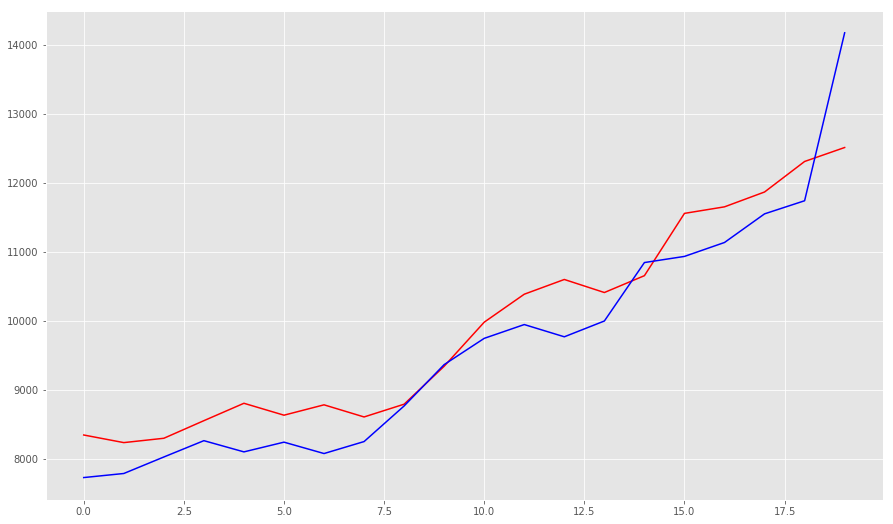

In [4]:
# predict price one day ahead
modelTraining(lag = 1)

Epoch 1/10
1441/1441 [==============================] - 1s - loss: 296708.8812     
Epoch 2/10
1441/1441 [==============================] - 1s - loss: 23002.0390     
Epoch 3/10
1441/1441 [==============================] - 1s - loss: 31204.6072     
Epoch 4/10
1441/1441 [==============================] - 1s - loss: 223014.0803     
Epoch 5/10
1441/1441 [==============================] - 1s - loss: 20609.4632     
Epoch 6/10
1441/1441 [==============================] - 1s - loss: 18498.3447     
Epoch 7/10
1441/1441 [==============================] - 1s - loss: 21146.4105     
Epoch 8/10
1441/1441 [==============================] - 1s - loss: 25429.5879     
Epoch 9/10
1441/1441 [==============================] - 1s - loss: 36505.5022     
Epoch 10/10
10/20 [==============>...............] - ETA: 0s

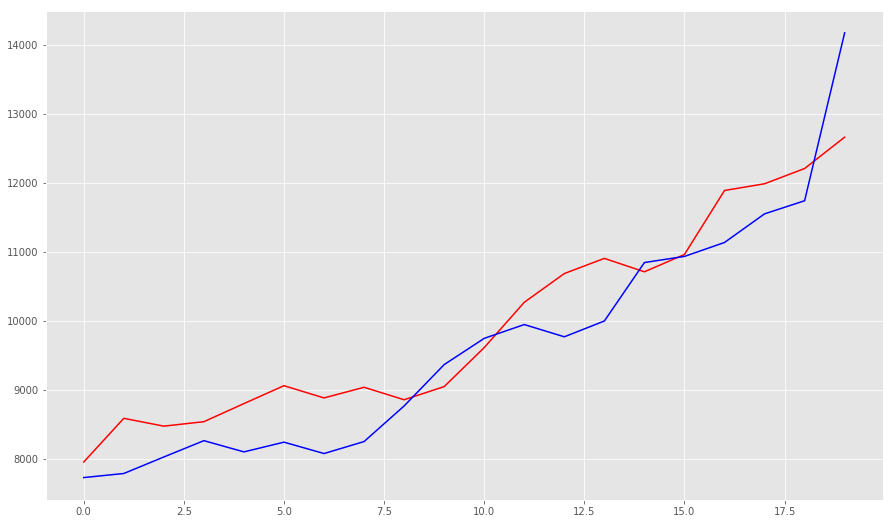

In [5]:
# predict price two days ahead
modelTraining(lag = 2)

Epoch 1/10
1441/1441 [==============================] - 1s - loss: 268291.3235     
Epoch 2/10
1441/1441 [==============================] - 1s - loss: 30493.9969     
Epoch 3/10
1441/1441 [==============================] - 1s - loss: 110808.8858     
Epoch 4/10
1441/1441 [==============================] - 1s - loss: 37949.9464     
Epoch 5/10
1441/1441 [==============================] - 1s - loss: 32182.4315     
Epoch 6/10
1441/1441 [==============================] - 1s - loss: 65980.2092     
Epoch 7/10
1441/1441 [==============================] - 1s - loss: 29583.0845     
Epoch 8/10
1441/1441 [==============================] - 1s - loss: 30398.3301     
Epoch 9/10
1441/1441 [==============================] - 1s - loss: 30351.2268     
Epoch 10/10
10/20 [==============>...............] - ETA: 0s

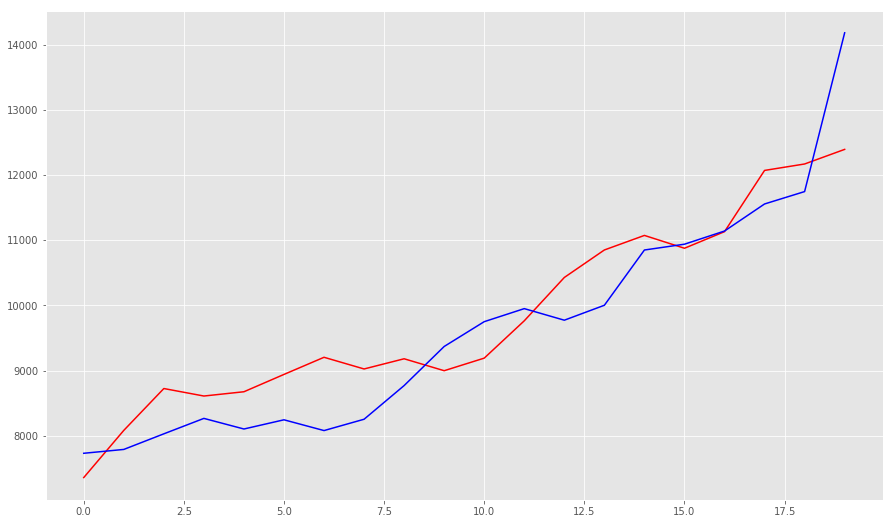

In [6]:
# predict price three days ahead
modelTraining(lag = 3)

Epoch 1/10
1441/1441 [==============================] - 1s - loss: 285904.3136     
Epoch 2/10
1441/1441 [==============================] - 1s - loss: 83486.7440     
Epoch 3/10
1441/1441 [==============================] - 1s - loss: 138110.3613     
Epoch 4/10
1441/1441 [==============================] - 1s - loss: 38117.1563     
Epoch 5/10
1441/1441 [==============================] - 1s - loss: 35421.0380     
Epoch 6/10
1441/1441 [==============================] - 1s - loss: 51300.8733     
Epoch 7/10
1441/1441 [==============================] - 1s - loss: 44759.6356     
Epoch 8/10
1441/1441 [==============================] - 1s - loss: 43410.7841     
Epoch 9/10
1441/1441 [==============================] - 1s - loss: 40674.9815     
Epoch 10/10
10/20 [==============>...............] - ETA: 0s

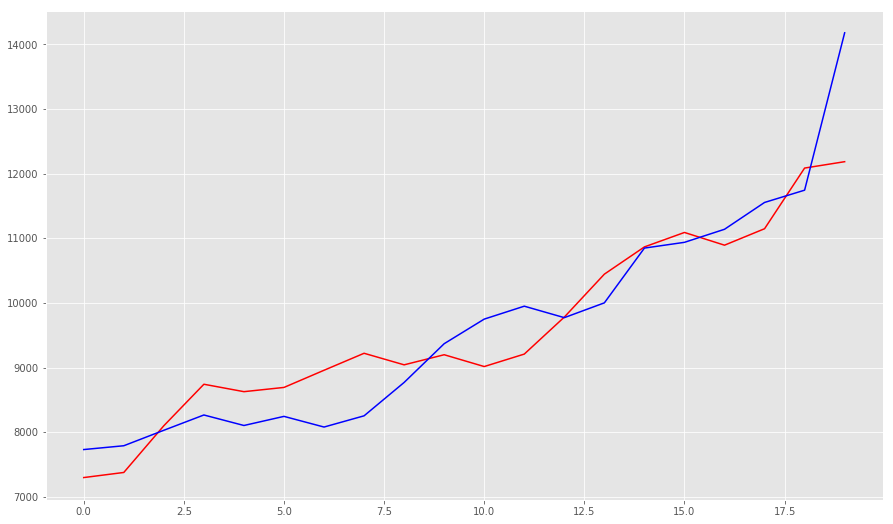

In [7]:
# predict price four days ahead
modelTraining(lag = 4)

Epoch 1/10
1441/1441 [==============================] - 1s - loss: 270560.0603     
Epoch 2/10
1441/1441 [==============================] - 1s - loss: 63113.1623     
Epoch 3/10
1441/1441 [==============================] - 1s - loss: 181236.4935     
Epoch 4/10
1441/1441 [==============================] - 1s - loss: 40144.4864     
Epoch 5/10
1441/1441 [==============================] - 1s - loss: 37824.1013     
Epoch 6/10
1441/1441 [==============================] - 1s - loss: 52455.6773     
Epoch 7/10
1441/1441 [==============================] - 1s - loss: 49821.6168     
Epoch 8/10
1441/1441 [==============================] - 1s - loss: 69673.7154     
Epoch 9/10
1441/1441 [==============================] - 1s - loss: 44162.0990     
Epoch 10/10
10/20 [==============>...............] - ETA: 0s

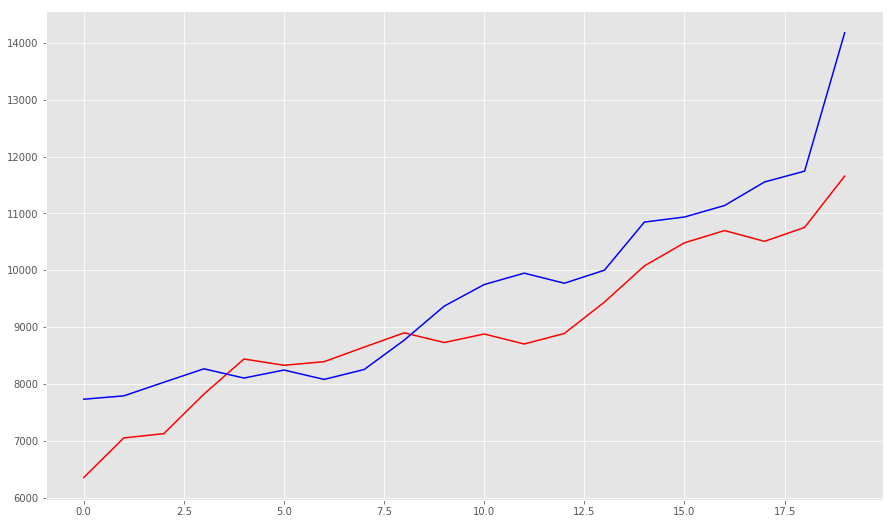

In [8]:
# predict price five days ahead
modelTraining(lag = 5)

Epoch 1/10
1441/1441 [==============================] - 1s - loss: 287092.9912     
Epoch 2/10
1441/1441 [==============================] - 1s - loss: 51400.3517     
Epoch 3/10
1441/1441 [==============================] - 1s - loss: 171990.1263     
Epoch 4/10
1441/1441 [==============================] - 1s - loss: 51094.1094     
Epoch 5/10
1441/1441 [==============================] - 1s - loss: 42363.4061     
Epoch 6/10
1441/1441 [==============================] - 1s - loss: 53340.2179     
Epoch 7/10
1441/1441 [==============================] - 1s - loss: 69760.9994     
Epoch 8/10
1441/1441 [==============================] - 1s - loss: 43110.0607     
Epoch 9/10
1441/1441 [==============================] - 1s - loss: 44529.2447     
Epoch 10/10
10/20 [==============>...............] - ETA: 0s

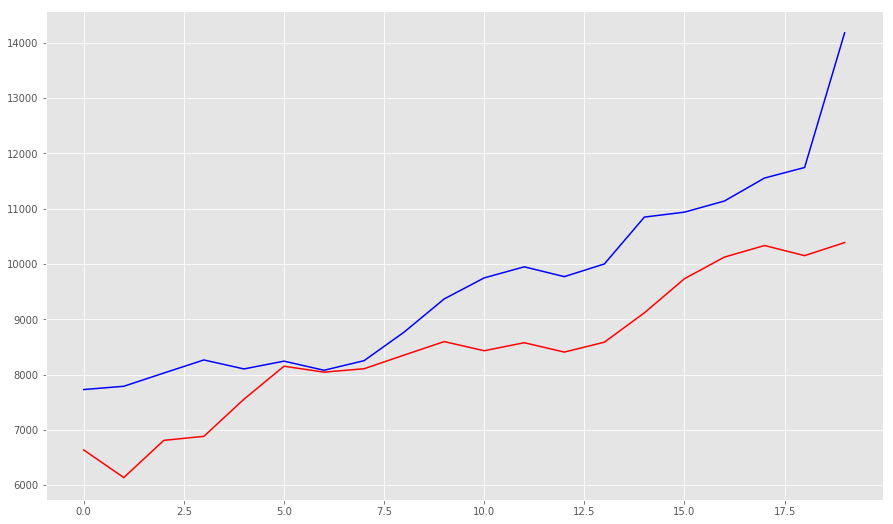

In [9]:
# predict price six days ahead
modelTraining(lag = 6)

Epoch 1/10
1441/1441 [==============================] - 1s - loss: 275568.0393     
Epoch 2/10
1441/1441 [==============================] - 1s - loss: 63362.5713     
Epoch 3/10
1441/1441 [==============================] - 1s - loss: 80058.9508     
Epoch 4/10
1441/1441 [==============================] - 1s - loss: 100551.3690    
Epoch 5/10
1441/1441 [==============================] - 1s - loss: 75996.7374     
Epoch 6/10
1441/1441 [==============================] - 1s - loss: 82686.0528     
Epoch 7/10
1441/1441 [==============================] - 1s - loss: 79938.8433     
Epoch 8/10
1441/1441 [==============================] - 1s - loss: 44455.9554     
Epoch 9/10
1441/1441 [==============================] - 1s - loss: 49561.3240     
Epoch 10/10
10/20 [==============>...............] - ETA: 0s

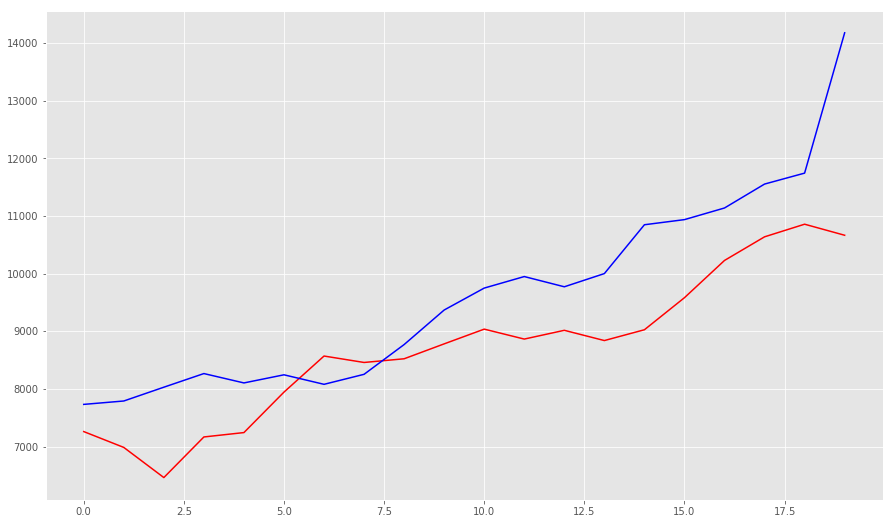

In [10]:
# predict price seven days ahead
modelTraining(lag = 7)